# Twitter Modeling
This project analyzes Twitter posts so that it finds and assembles the most frequent words and we apply the words to each post and based on the number of repeated words, the number of retweets and the number of favorites, we will determine whether this tweet is popular or not

1. <a href="#import">Import Necessary Libraries </a>
2. <a href="#api">API</a>
3. <a href="#make_df">Make DataFrma From API</a>
4. <a href="#read">Read & Describe DataFrame</a>
5. <a href="#clean">Clean Up The Data</a>
6. <a href="#Proccessing">Data Pre-Proccessing</a>



## 1 : Import Necessary Libraries <span id="import"></span>

In [1]:
import re
import string
import nltk 
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import os
import tweepy as tw
import pandas as pd
from collections import Counter 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn

[nltk_data] Downloading package stopwords to /home/hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2 : API <span id="api"></span>

Assign the keys and api outhhandler

In [2]:
# search_words = "كاس العرب"
# consumer_key = 'bJYpWBQFIJupHP6AGNtVV2AZb'
# consumer_secret = 'PxdlIXL2YqqtQAAK70xL4rsOqzf7Adkrh9J3KX0Y3xU69fsAe4'
# access_token = '984850335167582208-sErCTL5FbKojXt1Ahr7HzM2Z4RNxK8Q'
# access_secret = 'Oea7787cBnuxcX4G4mCPpne83BFBCB36VFh98iXqc3bWv'
# auth = tw.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tw.API(auth,wait_on_rate_limit=True)

Collect tweets

In [3]:
# tweets = tw.Cursor(api.search_tweets,
#               q=search_words).items(2000)
# tweets

## 3 : Make DataFrma From API <span id="make_df"></span>

DataFrame to do table for values

In [4]:
# twitter_df = pd.DataFrame({ 
#     'created_at':[],
#     'text':[],
#     'favorite_count':[],
#     'retweet_count':[]
# })

Iterate and assign tweets in DataFrame

In [5]:
# for tweet in tweets:
#     single_tweet = {
#          "created_at": tweet.created_at,
#          "text": tweet.text,
#          "favorite_count":tweet.favorite_count,
#          "retweet_count":tweet.retweet_count
#         }
#     twitter_df = twitter_df.append(single_tweet, ignore_index = True)

Convert the DataFrame to CSV File to make work fast

In [6]:
# twitter_df.to_csv('twitter_research1.csv')

## 4 : Read & Describe DataFrame  <span id="read"></span>

In [7]:
twitter_df1 = pd.read_csv('twitter_research1.csv',index_col=0)
twitter_df1

,created_at,text,favorite_count,retweet_count
0,2021-12-25 10:18:41+00:00,RT @etmrna9: قصة عجيبة !!\nواحد عمره ثمانين سن...,0.0,26.0
1,2021-12-25 10:18:11+00:00,RT @MarocPro86: #كأس_العرب #كأس_العالم 🇲🇦 htt...,0.0,9.0
2,2021-12-25 10:17:55+00:00,RT @AdilAlHammadi: مشاركتي مع المذيع المتألق #...,0.0,1.0
3,2021-12-25 10:16:33+00:00,RT @abadyqa: سؤال ..\n\nلمن يهمه الأمر ..\n\nل...,0.0,93.0
4,2021-12-25 10:16:29+00:00,RT @beINSPORTS_news: ⚽️ جمال بلماضي مدرب منتخب...,0.0,76.0
...,...,...,...,...
1995,2021-12-24 13:33:58+00:00,RT @ElDjazair_Daily: 🔴بوقرة : كأس العرب أول تت...,0.0,3.0
1996,2021-12-24 13:33:02+00:00,RT @mohamedelgazar4: 📸 : رفع الأعلام الجزائرية...,0.0,5.0
1997,2021-12-24 13:32:50+00:00,موسيماني هيضيع شريف وافشه وكروش أيضا هيضيعهم ب...,1.0,0.0
1998,2021-12-24 13:30:22+00:00,RT @al_liwaaQT: #اللواء| لجنة عمليات أمن وسلام...,0.0,1.0


## 5 : Clean Up The Data <span id="clean"></span>

Clean data from impurities, emojis and hashtags, and correct spelling of words

In [8]:
#Preprocess data¶
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ123456789'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans(' ', ' ', punctuations_list)
    return text.translate(translator)

#normalize_arabic
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("گ", "ك", text)

    text = re.sub("\n"," ",text)
    text = text.replace("الجزاير", "الجزائر")
    text = text.replace("العرب","عرب")
    text = text.replace(" الكاس","كاس")
    text = text.replace("كاس ","كاس")
    text = text.replace("الكامل","كامل")
    text = text.replace("العالم"," عالم")
    text = text.replace("الجزائر","جزائر")
    text = text.replace("جزائري","جزائر")
    text = text.replace("جزائرية","جزائر")
    text = text.replace("كاسعرب","كاس عرب")
    text = text.replace("مر"," ")
    text = text.replace("وجمال","جمال")
    text = text.replace("والريان","الريان")
    text = text.replace("ة", "ة ")
    text = re.sub(r"\s*[A-Za-z0-9']+\b", "" , text)
    return text

#remove_repeating_char
def remove_repeating_char(text):
    text = re.sub(r'(.)\1+', r'\1', text)    
    return re.sub(r'(.)\1+', r'\1', text)

# Remove emojis 
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)u"\u2709"
        u"\u2709-\U0001F1FF"  # flags u"\u2709"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)

# Remove emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U00002702-\U000027B0"
      u"\U000024C2-\U0001F251"
      u"\U0001f926-\U0001f937"
      u"\U00010000-\U0010ffff"
      u"\u2640-\u2642"
      u"\u2600-\u2B55"
      u"\u200d"
      u"\u23cf"
      u"\u23e9"
      u"\u231a"
      u"\ufe0f"
      "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r' ', string)

# Apply to The Post
def processPost(tweet): 

    #Replace @username with empty string
    tweet = re.sub(r'RT +@\w+:', ' ', tweet)
    tweet = re.sub(r'@\w+', ' ', tweet)
    
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    tweet=deEmojify(tweet)
    tweet=remove_emoji(tweet)
    return tweet

Apply Post Proccess

In [9]:
twitter_df2 = twitter_df1 
twitter_df2['text'] = twitter_df2['text'].apply(lambda x: processPost(x)) 
twitter_df2

,created_at,text,favorite_count,retweet_count
0,2021-12-25 10:18:41+00:00,قصة عجيبة واحد ع ه ثمانين سنة وما يطلع من الب...,0.0,26.0
1,2021-12-25 10:18:11+00:00,كاس عرب كاس عالم,0.0,9.0
2,2021-12-25 10:17:55+00:00,مشاركتي مع المذيع المتالق خالدالغندور برنامج ...,0.0,1.0
3,2021-12-25 10:16:33+00:00,سؤال لمن يهمه الا ليش العماله المنزلية لما تو...,0.0,93.0
4,2021-12-25 10:16:29+00:00,جمال بلماضي مدرب منتخب جزائر يكشف عن قائم...,0.0,76.0
...,...,...,...,...
1995,2021-12-24 13:33:58+00:00,بوقرة كاس عرب اول تويج في مشواري مع المنتخب ...,0.0,3.0
1996,2021-12-24 13:33:02+00:00,رفع الاعلام جزائرة في شوارع غزة بفلسطين احت...,0.0,5.0
1997,2021-12-24 13:32:50+00:00,موسيماني هيضيع شريف وافشه وكروش ايضا هيضيعهم ب...,1.0,0.0
1998,2021-12-24 13:30:22+00:00,الواء لجنة عمليات امن وسلامة بطولة كاس عالم ت...,0.0,1.0


Convert Columns To Correct Type

In [10]:
twitter_df2['favorite_count'] = twitter_df2['favorite_count'].astype(int)
twitter_df2['retweet_count'] = twitter_df2['retweet_count'].astype(int)
twitter_df2

,created_at,text,favorite_count,retweet_count
0,2021-12-25 10:18:41+00:00,قصة عجيبة واحد ع ه ثمانين سنة وما يطلع من الب...,0,26
1,2021-12-25 10:18:11+00:00,كاس عرب كاس عالم,0,9
2,2021-12-25 10:17:55+00:00,مشاركتي مع المذيع المتالق خالدالغندور برنامج ...,0,1
3,2021-12-25 10:16:33+00:00,سؤال لمن يهمه الا ليش العماله المنزلية لما تو...,0,93
4,2021-12-25 10:16:29+00:00,جمال بلماضي مدرب منتخب جزائر يكشف عن قائم...,0,76
...,...,...,...,...
1995,2021-12-24 13:33:58+00:00,بوقرة كاس عرب اول تويج في مشواري مع المنتخب ...,0,3
1996,2021-12-24 13:33:02+00:00,رفع الاعلام جزائرة في شوارع غزة بفلسطين احت...,0,5
1997,2021-12-24 13:32:50+00:00,موسيماني هيضيع شريف وافشه وكروش ايضا هيضيعهم ب...,1,0
1998,2021-12-24 13:30:22+00:00,الواء لجنة عمليات امن وسلامة بطولة كاس عالم ت...,0,1


Spliting The Tweets to single Words

In [11]:
twitter_df3 = twitter_df2
twitter_df3["text"] = twitter_df3["text"].apply(lambda x: x.split())
twitter_df2

,created_at,text,favorite_count,retweet_count
0,2021-12-25 10:18:41+00:00,"[قصة, عجيبة, واحد, ع, ه, ثمانين, سنة, وما, يطل...",0,26
1,2021-12-25 10:18:11+00:00,"[كاس, عرب, كاس, عالم]",0,9
2,2021-12-25 10:17:55+00:00,"[مشاركتي, مع, المذيع, المتالق, خالدالغندور, بر...",0,1
3,2021-12-25 10:16:33+00:00,"[سؤال, لمن, يهمه, الا, ليش, العماله, المنزلية,...",0,93
4,2021-12-25 10:16:29+00:00,"[جمال, بلماضي, مدرب, منتخب, جزائر, يكشف, عن, ق...",0,76
...,...,...,...,...
1995,2021-12-24 13:33:58+00:00,"[بوقرة, كاس, عرب, اول, تويج, في, مشواري, مع, ا...",0,3
1996,2021-12-24 13:33:02+00:00,"[رفع, الاعلام, جزائرة, في, شوارع, غزة, بفلسطين...",0,5
1997,2021-12-24 13:32:50+00:00,"[موسيماني, هيضيع, شريف, وافشه, وكروش, ايضا, هي...",1,0
1998,2021-12-24 13:30:22+00:00,"[الواء, لجنة, عمليات, امن, وسلامة, بطولة, كاس,...",0,1


## 6 : Data Pre-Proccessing <span id="Proccessing"></span>

### StopWords

StopWords Such as (في, التي, الذي...الخ)

In [12]:
stopwords_list = stopwords.words('arabic')
# Add messy Characters to stopWords
stopwords_list += ['ل','ال','ا']
print(stopwords_list)

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [13]:
twitter_df4 = twitter_df3
twitter_df4["text"]=twitter_df4["text"].apply(lambda x: [item for item in x if item not in stopwords_list])
twitter_df4

,created_at,text,favorite_count,retweet_count
0,2021-12-25 10:18:41+00:00,"[قصة, عجيبة, سنة, يطلع, البيت, حتي, يعلم, امه,...",0,26
1,2021-12-25 10:18:11+00:00,"[كاس, عرب, كاس, عالم]",0,9
2,2021-12-25 10:17:55+00:00,"[مشاركتي, المذيع, المتالق, خالدالغندور, برنامج...",0,1
3,2021-12-25 10:16:33+00:00,"[سؤال, لمن, يهمه, الا, ليش, العماله, المنزلية,...",0,93
4,2021-12-25 10:16:29+00:00,"[جمال, بلماضي, مدرب, منتخب, جزائر, يكشف, قائمة...",0,76
...,...,...,...,...
1995,2021-12-24 13:33:58+00:00,"[بوقرة, كاس, عرب, اول, تويج, مشواري, المنتخب, ...",0,3
1996,2021-12-24 13:33:02+00:00,"[رفع, الاعلام, جزائرة, شوارع, غزة, بفلسطين, اح...",0,5
1997,2021-12-24 13:32:50+00:00,"[موسيماني, هيضيع, شريف, وافشه, وكروش, ايضا, هي...",1,0
1998,2021-12-24 13:30:22+00:00,"[الواء, لجنة, عمليات, امن, وسلامة, بطولة, كاس,...",0,1


In [14]:
all_words = [word for tokens in twitter_df4["text"] for word in tokens]

In [15]:
counter = Counter(all_words)
most_common_words = counter.most_common(10)
most_common_words = [i[0] for i in most_common_words]
print(counter.most_common(10))
most_common_words

[('عرب', 1309), ('كاس', 1160), ('جزائر', 554), ('جمال', 402), ('قطر', 357), ('براهيمي', 298), ('ياسين', 276), ('شرفي', 274), ('الريان', 266), ('علي', 265)]


['عرب',
 'كاس',
 'جزائر',
 'جمال',
 'قطر',
 'براهيمي',
 'ياسين',
 'شرفي',
 'الريان',
 'علي']

Proccess Populer_text

In [16]:
#This Function To make Populer_text column
def proccess_populer_text(row):
    cnt = 0
    for j in most_common_words:
        if j in row:
            cnt +=1
    if cnt > 3: 
        return True
    else: 
        return False

Number Of Populer Text with text that has two or more of repeated words

In [17]:
twitter_df4['populer_text'] = twitter_df1["text"].apply(lambda x:proccess_populer_text(x))
len(twitter_df4[twitter_df4['populer_text'] == True])
twitter_df4

,created_at,text,favorite_count,retweet_count,populer_text
0,2021-12-25 10:18:41+00:00,"[قصة, عجيبة, سنة, يطلع, البيت, حتي, يعلم, امه,...",0,26,False
1,2021-12-25 10:18:11+00:00,"[كاس, عرب, كاس, عالم]",0,9,False
2,2021-12-25 10:17:55+00:00,"[مشاركتي, المذيع, المتالق, خالدالغندور, برنامج...",0,1,False
3,2021-12-25 10:16:33+00:00,"[سؤال, لمن, يهمه, الا, ليش, العماله, المنزلية,...",0,93,False
4,2021-12-25 10:16:29+00:00,"[جمال, بلماضي, مدرب, منتخب, جزائر, يكشف, قائمة...",0,76,False
...,...,...,...,...,...
1995,2021-12-24 13:33:58+00:00,"[بوقرة, كاس, عرب, اول, تويج, مشواري, المنتخب, ...",0,3,False
1996,2021-12-24 13:33:02+00:00,"[رفع, الاعلام, جزائرة, شوارع, غزة, بفلسطين, اح...",0,5,True
1997,2021-12-24 13:32:50+00:00,"[موسيماني, هيضيع, شريف, وافشه, وكروش, ايضا, هي...",1,0,False
1998,2021-12-24 13:30:22+00:00,"[الواء, لجنة, عمليات, امن, وسلامة, بطولة, كاس,...",0,1,False


Assign (populer retweet) and (populer favorite) with True or False Values

In [18]:
twitter_df4['populer_retweet'] = twitter_df4["retweet_count"].apply(lambda x:False if (x < 70) else True)
twitter_df4['populer_favorite'] = twitter_df4["favorite_count"].apply(lambda x:False if (x < 3) else True)

Number of tweets have more than 3 likes

In [19]:
len(twitter_df4[twitter_df4.populer_favorite == True])

220

Number of tweets have more than 50 retweet

In [20]:
len(twitter_df4[twitter_df4.populer_retweet == True])

450

#### Start to assign the final result with ("Populer","UnPopuler") 

In [21]:
twitter_df1 = pd.read_csv('twitter_research1.csv',index_col=0)
twitter_df4['text'] = twitter_df1['text'].apply(lambda x: processPost(x)) 
twitter_df4['Populer'] = 'Unknown'
twitter_df4

,created_at,text,favorite_count,retweet_count,populer_text,populer_retweet,populer_favorite,Populer
0,2021-12-25 10:18:41+00:00,قصة عجيبة واحد ع ه ثمانين سنة وما يطلع من الب...,0,26,False,False,False,Unknown
1,2021-12-25 10:18:11+00:00,كاس عرب كاس عالم,0,9,False,False,False,Unknown
2,2021-12-25 10:17:55+00:00,مشاركتي مع المذيع المتالق خالدالغندور برنامج ...,0,1,False,False,False,Unknown
3,2021-12-25 10:16:33+00:00,سؤال لمن يهمه الا ليش العماله المنزلية لما تو...,0,93,False,True,False,Unknown
4,2021-12-25 10:16:29+00:00,جمال بلماضي مدرب منتخب جزائر يكشف عن قائم...,0,76,False,True,False,Unknown
...,...,...,...,...,...,...,...,...
1995,2021-12-24 13:33:58+00:00,بوقرة كاس عرب اول تويج في مشواري مع المنتخب ...,0,3,False,False,False,Unknown
1996,2021-12-24 13:33:02+00:00,رفع الاعلام جزائرة في شوارع غزة بفلسطين احت...,0,5,True,False,False,Unknown
1997,2021-12-24 13:32:50+00:00,موسيماني هيضيع شريف وافشه وكروش ايضا هيضيعهم ب...,1,0,False,False,False,Unknown
1998,2021-12-24 13:30:22+00:00,الواء لجنة عمليات امن وسلامة بطولة كاس عالم ت...,0,1,False,False,False,Unknown


("Populer","UnPopuler") Proccess

In [22]:
twitter_df6 = twitter_df4
# Function to return  ("Populer","UnPopuler")
def Populer_UnPopuler(df):
    arr = []
    for i in range(len(df)):
        if any([
            df.iloc[i]['populer_retweet'],
            df.iloc[i]['populer_text'],
            df.iloc[i]['populer_favorite']
        ]):
            arr.append('Populer')
        else:
            arr.append('UnPopuler')
    return arr

twitter_df6['Populer'] = Populer_UnPopuler(twitter_df6)
twitter_df6.to_csv('twitter_df6.csv')
twitter_df6

,created_at,text,favorite_count,retweet_count,populer_text,populer_retweet,populer_favorite,Populer
0,2021-12-25 10:18:41+00:00,قصة عجيبة واحد ع ه ثمانين سنة وما يطلع من الب...,0,26,False,False,False,UnPopuler
1,2021-12-25 10:18:11+00:00,كاس عرب كاس عالم,0,9,False,False,False,UnPopuler
2,2021-12-25 10:17:55+00:00,مشاركتي مع المذيع المتالق خالدالغندور برنامج ...,0,1,False,False,False,UnPopuler
3,2021-12-25 10:16:33+00:00,سؤال لمن يهمه الا ليش العماله المنزلية لما تو...,0,93,False,True,False,Populer
4,2021-12-25 10:16:29+00:00,جمال بلماضي مدرب منتخب جزائر يكشف عن قائم...,0,76,False,True,False,Populer
...,...,...,...,...,...,...,...,...
1995,2021-12-24 13:33:58+00:00,بوقرة كاس عرب اول تويج في مشواري مع المنتخب ...,0,3,False,False,False,UnPopuler
1996,2021-12-24 13:33:02+00:00,رفع الاعلام جزائرة في شوارع غزة بفلسطين احت...,0,5,True,False,False,Populer
1997,2021-12-24 13:32:50+00:00,موسيماني هيضيع شريف وافشه وكروش ايضا هيضيعهم ب...,1,0,False,False,False,UnPopuler
1998,2021-12-24 13:30:22+00:00,الواء لجنة عمليات امن وسلامة بطولة كاس عالم ت...,0,1,False,False,False,UnPopuler


In [24]:
twitter_df6.to_csv("Final_Twitter.csv")

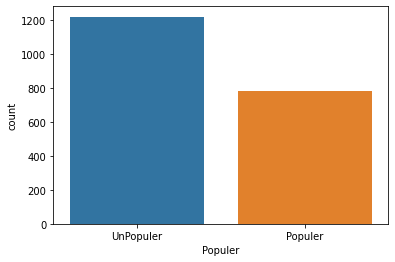

In [25]:
sns.countplot(data= twitter_df6, x = "Populer")
plt.show()